# Visual Analytics

## Using Schneiderman's mantra within the Visual Analytics Process:

Use visualisation for analysis according the each research question starting from Q1 to Q4. Each research question has a slightly different preprocessed dataset, that originally comes from the same source, and undertook the same handling of missing values.

## **Q1: Categorisation of Urban and Rural Stops** - 
- **Research Question**: How is the distribution of Stop Types and Bus Stop Types differentiated between rural and urban area and how do they influence the accessibility of public transport?

### Overview: Looking at different plots and graphs for categorical data to gain understanding.


In [6]:
!pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/110.5 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.5 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.1 MB/s eta 0:00:00


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

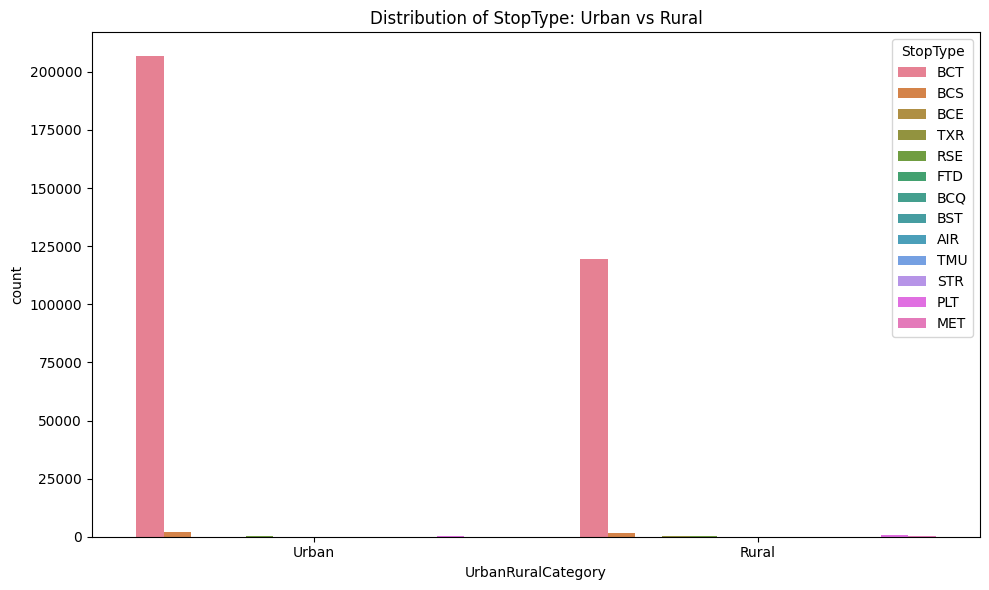

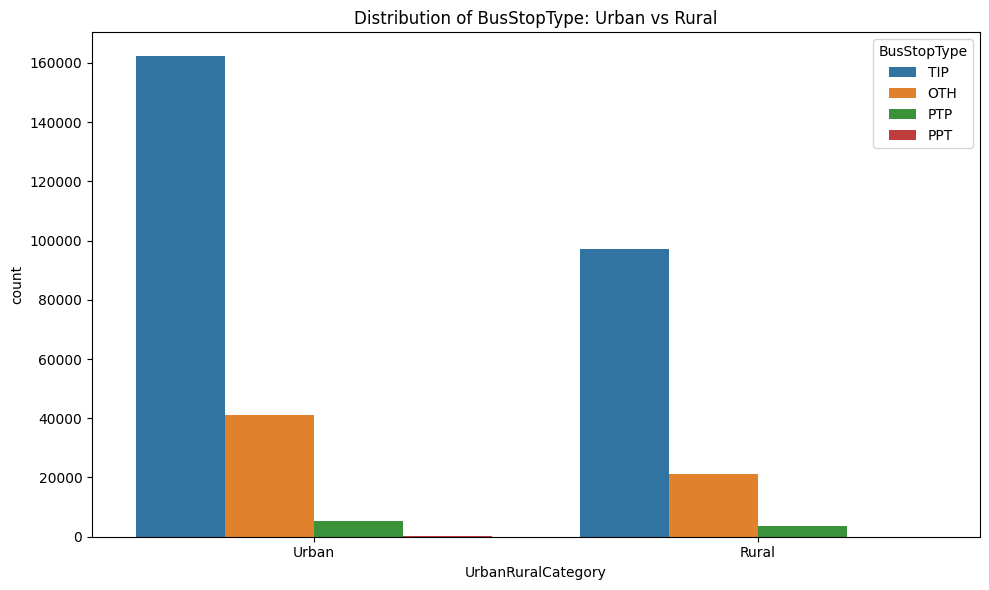

In [12]:
# Loading the dataset
data = pd.read_csv('../data/processed/q1_processed_stops.csv')

# 1. Count plot for StopType distribution between Urban and Rural
plt.figure(figsize = (10, 6))
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'StopType')
plt.title('Distribution of StopType: Urban vs Rural')
plt.tight_layout()
plt.savefig('../outputs/stop_type_distribution.png')  # Saving the plot
plt.show()

# 2. Count plot for BusStopType distribution between Urban and Rural
plt.figure(figsize = (10, 6))
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'BusStopType')
plt.title('Distribution of BusStopType: Urban vs Rural')
plt.tight_layout()
plt.savefig('../outputs/bus_stop_type_distribution.png')  # Saving the plot
plt.show()

- StopType Distribution:  BCT is very dominant. It is hard to see the other categories. I will transform the y axis to a log scale and possibly remove the most dominant variable.
- BusStopType Distribution: TIP is very dominant

### Zoom: **Using Folium to Create Map for London**

In [13]:
# Creating map centered around a specific location like London
#m = folium.Map(location = [51.5074, -0.1278], zoom_start = 6)

# Initialising the  MarkerCluster to group nearby markers
#marker_cluster = MarkerCluster().add_to(m)

#for _, row in data.iterrows():
    #folium.CircleMarker(
        #location = [row['Latitude'], row['Longitude']],
        #radius = 5,
        #color = 'blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        #fill = True,
        #fill_color='blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        #fill_opacity = 0.7,
        #popup = f"StopType: {row['StopType']}<br>BusStopType: {row['BusStopType']}<br>Location: {row['Latitude']}, {row['Longitude']}"
    ).add_to(marker_cluster)
    
# Saving the map as an HTML file
#m.save('../outputs/choropleth_map.html')

- I am not suprised that there would be issues here. The size of dataset, which has over 30,000 data items, is far too much for HTML interative maps.
- I am going to do the maps on Tableau 2024.

In [ ]:
data.to.csv('

### ** Side-by-side count charts using y log scale**

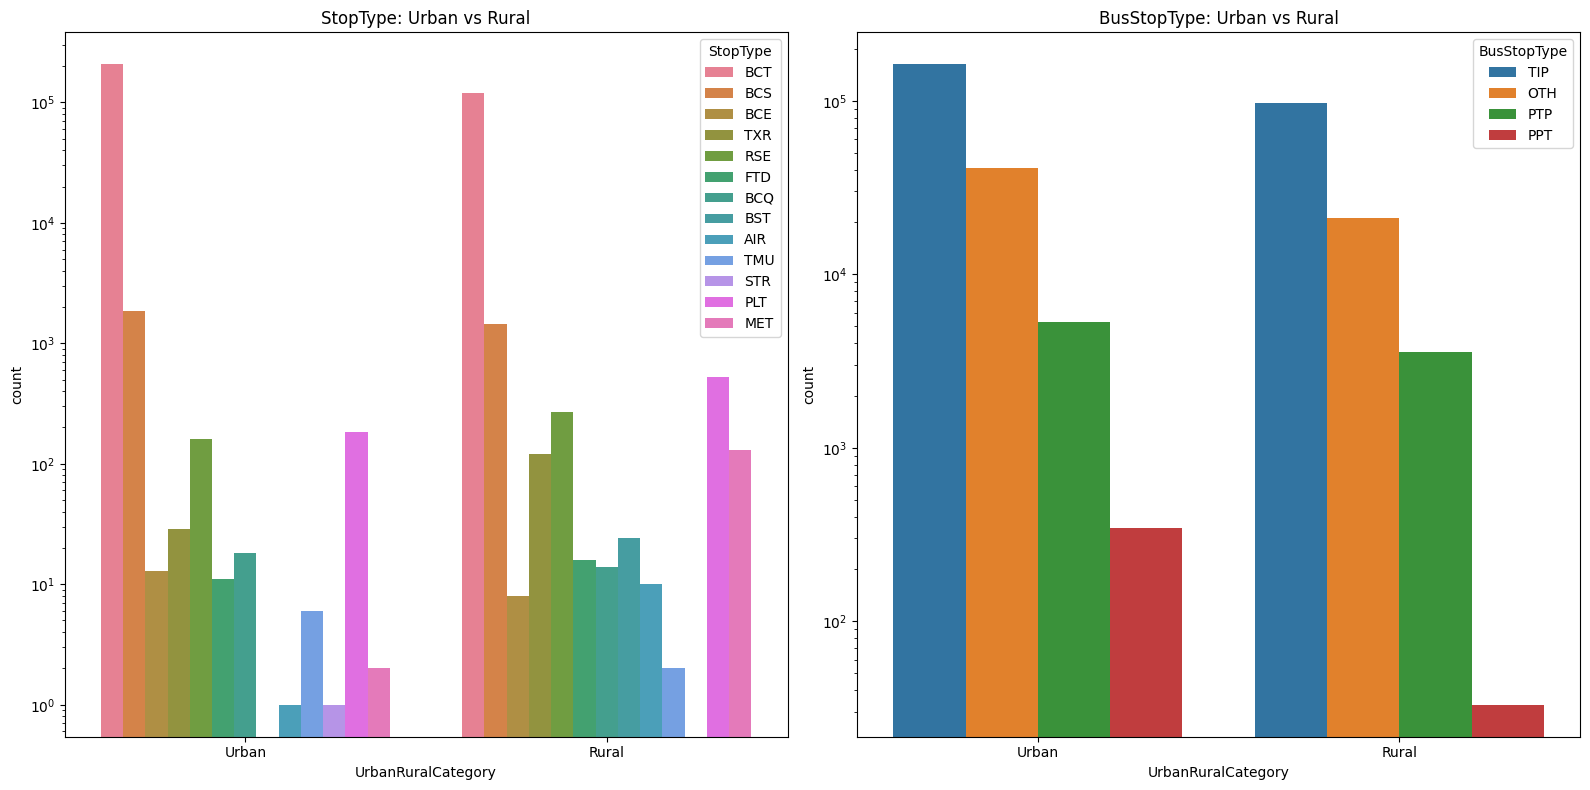

In [16]:
# Plotting side-by-side bar charts for StopType and BusStopType distribution
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# StopType
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
axes[0].set_title('StopType: Urban vs Rural')
axes[0].set_yscale('log')  # Applying log scale to the y-axis

# BusStopType
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
axes[1].set_title('BusStopType: Urban vs Rural')
axes[1].set_yscale('log')  # Applying log scale to the y-axis

plt.tight_layout()
plt.savefig('../outputs/stop_type_bus_stop_type_comparison.png')
plt.show()

### **Filter** - Excluding dominant classes for the sake of imbalance and variability

In [ ]:
# Filtering out the dominant StopType and BusStopType categories
filtered_data = data[
    ~data['StopType'].isin(['BCT']) & ~data['BusStopType'].isin(['TIP'])
]

# Plotting side-by-side count plots for filtered data
fig, axes = plt.subplots(1,2, figsize = (16, 8))

# StopType
sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
axes[0].set_title('Filtered StopType: Urban vs Rural')

# BusStopType
sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
axes[1].set_title('Filtered BusStopType: Urban vs Rural')

plt.tight_layout()
plt.savefig('../outputs/filtered_stop_type_bus_stop_type_comparison.png')
plt.show()